In [1]:
import os
import pandas as pd

base_dir = 'dataset/flowers-recognition_configed'
input_data_dir = {'test':None, 'train':None, 'validation':None}

totalcounter = 0
dfs = {'train':None, 'validation':None, 'test':None}
for i in input_data_dir:
    print(i)
    classes_names = os.listdir(os.path.join(base_dir, i))
    input_data_dir[i] = os.path.join(base_dir, i)
    classes = {}
    for s in classes_names:
        classes[s] = len(os.listdir(os.path.join(base_dir, i, s)))
        
    inputdata = {'flower':None, 'count':None}
    inputdata['flower'] = [f for f, c in classes.items()]
    inputdata['count'] = [c for f, c in classes.items()]
    
    dfs[i] = pd.DataFrame(inputdata)
    totalcounter += dfs[i]['count'].sum()
    print('\t', 'image count mean:', int(dfs[i]['count'].mean()))
    print('\t', 'image count :', int(dfs[i]['count'].sum()))
print('-'.join(['' for i in range(0, 16)]))
print('total image count:', totalcounter)    

class_count = len(classes)

test
	 image count mean: 183
	 image count : 915
train
	 image count mean: 368
	 image count : 1840
validation
	 image count mean: 181
	 image count : 905
---------------
total image count: 3660


In [5]:
def show_model_info(model_h):
    for i, v in model_h['hyper_parameters'].items():
        val = v
        if type(val) == str:
            if 'RMSprop' in v: val = 'RMSprop'
        print(i+':', '\t',val)
    duration = model_h.get('train_duration')
    if duration != None: duration = round(duration/60, 1)
    #print(model_h['history'].model.get_config())
    print('train duration:\t', duration)

In [2]:
from keras import optimizers
import math

h_params = {}

# image
h_params['image_size'] = 150 # defult 150
h_params['batch_size'] = 20 # defult 20

# fit
h_params['epochs'] = 40
h_params['steps_per_epoch'] = math.ceil(dfs['train']['count'].sum()/h_params['batch_size']) # defult 100
h_params['validation_steps'] = math.ceil(dfs['validation']['count'].sum()/h_params['batch_size']) # defult 50

# compile
h_params['learning_rate'] = 1e-4 # defult 2e-5
h_params['optimizer'] = optimizers.RMSprop(lr=h_params['learning_rate'])
h_params['metrics'] = ['acc']
h_params['fine_tuning_startlayer'] = 'block5_conv1' # if None means no fine tuning is used.

Using TensorFlow backend.


In [ ]:
def show_model_info(model_h):
    for i, v in model_h['hyper_parameters'].items():
        val = v
        if type(val) == str:
            if 'RMSprop' in v: val = 'RMSprop'
        print(i+':', '\t',val)
    duration = model_h.get('train_duration')
    if duration != None: duration = round(duration/60, 1)
    #print(model_h['history'].model.get_config())
    print('train duration:\t', duration)

model file name is: 15781_6_2_6_00_pretrained_vgg16_embeded_bestmodel


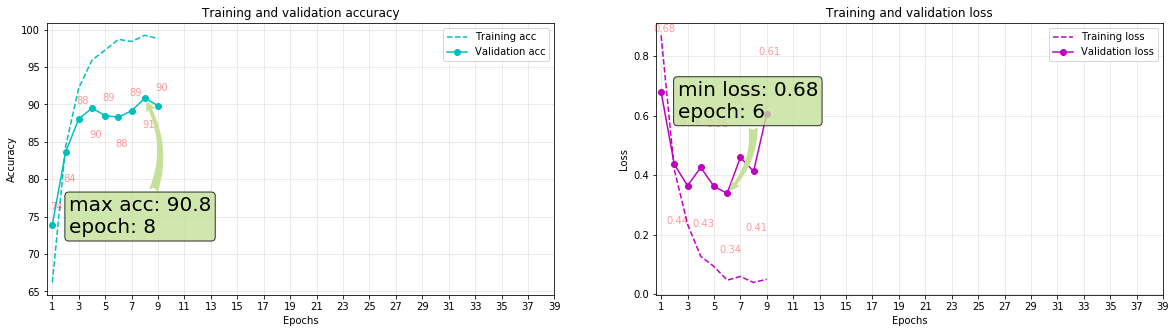

image_size: 	 150
batch_size: 	 20
epochs: 	 40
steps_per_epoch: 	 92
validation_steps: 	 46
learning_rate: 	 0.0001
optimizer: 	 RMSprop
metrics: 	 ['acc']
fine_tuning_startlayer: 	 block5_conv1
train duration:	 6.9
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 16,813,381
Trainable params: 9,178,117
Non-trainable params: 7,635,264
_________________________________________________________________


In [6]:
import os
import helper as hlp
#from keras import layers
#from keras import models

model_filename = '15781_6_2_6_00_pretrained_vgg16_embeded_bestmodel'
model_h = hlp.load('models/' + model_filename)
print('model file name is:', model_filename)
hlp.show_model_plot(model_h);
show_model_info(model_h)
model_h['history'].model.summary()

In [8]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
model = model_h['history'].model
test_dir = input_data_dir['test']
test_generator = test_datagen.flow_from_directory(
                                            test_dir,
                                            target_size=(h_params['image_size'], h_params['image_size']),
                                            batch_size=h_params['batch_size'],
                                            class_mode='categorical')
test_loss, test_acc = model.evaluate_generator(test_generator,
                                               steps=math.ceil(dfs['test']['count'].sum()/h_params['batch_size']))
print('test acc:', test_acc)

Found 915 images belonging to 5 classes.
test acc: 0.8732240411753212
